# Assignment (US Baby Names 1880-2010)

** 과제 설명 **
- 제출 기한: 9월 23일(토) 밤 11시 59분
- 데이터 : 1880년도부터 2010년까지 태어난 아이들의 이름 데이터로 각 년도별 txt 파일로 되어 있으며 '이름, 성별, 이름과 성별이 같은 아이의 수'로 구성되어 있음.
- Assignment 1과 Assignment 2를 같은 데이터로 진행하며, Assignment 2에 해당하는 문제는 문제 끝에 (ASN2)라고 표기되어 있음. Assingment 2까지 모두 완료한 후에 과제를 제출하면 됨
- Q#) 이외에 # to do 부분도 채워야 함 (# to do 부분은 별도의 배점은 없음)
- 문제의 방향성 파악을 위해 답을 함께 제시하지만, 똑같은 형태의 답을 얻을 필요는 없음. 문제에서 원하는 내용을 포함하고 있는 답이면 가능. 꼭 한 칸에 답을 완성할 필요도 없음
- 총 17문제로 문제별 난이도는 다르지만 모두 6점으로 하며, 다 맞을 경우에는 102점이 아닌 100점으로 함
- 문제별 부분 점수는 없음

그 밖의 문의 사항은 je5719@postech.ac.kr로 문의 주시기 바랍니다.

In [1]:
from __future__ import division
import numpy as np  # to do : import numpy

np.set_printoptions(precision=4)
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
# to do : import pandas
# to do : import Series, DataFrame
# to do : import pyplot

In [2]:
# to do : jupter notebook에서 파일을 보이기 위해 필요한 명령어

plt.rc('figure', figsize=(12, 5))

In [3]:
%pwd
add = %pwd 
add
#add + '/yob1880.txt'
# to do : 디렉토리 찾기

u'/home/pirl/Desktop/inClassWorks/week3/170918_dataCleanse/Assignment'

### Q1) babynames 폴더의 'yob1880.txt' 를 읽고 표 형태로 보이기

주의
- 원 데이터의 header 유무 파악
- columns 이름은 'name', 'sex', 'births'로 지정

In [4]:
baby80 = open(add + '/babynames/yob1880.txt', 'r')
df1880 = pd.read_csv(baby80, names =['name', 'sex', 'births'], index_col=None)
df1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


### Q2) 1880년에 태어난 여자 아이와 남자 아이의 수 구하기

Hint : Groupby()

In [5]:
df1880.sex.value_counts()
gender80 = DataFrame(df1880.groupby(df1880['sex']).sum())
gender80

,births
sex,
F,90993
M,110493


In [6]:
df1880.count()

name      2000
sex       2000
births    2000
dtype: int64

,births
sex,
F,90993
M,110493


### Q3) 년도별로 나눠져 있는 데이터를 하나의 DataFrame으로 합치기

주의
- 위에서와 마찬가지로 columns 이름은 'name', 'sex', 'births'로 지정
- 새로운 column 'year'을 추가해 각 데이터가 몇 년도의 데이터인지 정보를 함께 저장

Hint
- for문
- 'yob%d' % 1880 -> yob1880
- pandas.concat

In [8]:
#alternative simple code for below
dfNew = []
for i in range(1880, 2011):
    birthFile = open (add + '/babynames/yob%d.txt' % i, 'r')
    #original df with 3 columns
    dfOrigin = pd.read_csv(birthFile, names =['name', 'sex', 'births'], index_col=None)
    #adding year column to each df
    
    dfOrigin['year'] = i
    dfNew.append(dfOrigin)
dfNew

[           name sex  births  year
 0          Mary   F    7065  1880
 1          Anna   F    2604  1880
 2          Emma   F    2003  1880
 3     Elizabeth   F    1939  1880
 4        Minnie   F    1746  1880
 5      Margaret   F    1578  1880
 6           Ida   F    1472  1880
 7         Alice   F    1414  1880
 8        Bertha   F    1320  1880
 9         Sarah   F    1288  1880
 10        Annie   F    1258  1880
 11        Clara   F    1226  1880
 12         Ella   F    1156  1880
 13     Florence   F    1063  1880
 14         Cora   F    1045  1880
 15       Martha   F    1040  1880
 16        Laura   F    1012  1880
 17       Nellie   F     995  1880
 18        Grace   F     982  1880
 19       Carrie   F     949  1880
 20        Maude   F     858  1880
 21        Mabel   F     808  1880
 22       Bessie   F     794  1880
 23       Jennie   F     793  1880
 24     Gertrude   F     787  1880
 25        Julia   F     783  1880
 26       Hattie   F     769  1880
 27        Edith   F

In [7]:
dfTotal = pd.DataFrame()
for i in range(1880, 2011):
    birthFile = open (add + '/babynames/yob%d.txt' % i, 'r')
    #original df with 3 columns
    dfOrigin = pd.read_csv(birthFile, names =['name', 'sex', 'births'], index_col=None)
    #adding year column to each df
    
    #length = len(dfOrigin)
    #yearList = ['%d' %i] * length
    #year = pd.DataFrame({'year':yearList}, index=None)
    dfOrigin['year'] = i
    #dfNew = pd.concat([dfOrigin, year], axis=1)
    
    #adding prev_df to total_df
    dfTotal = pd.concat([dfTotal, dfOrigin], axis =0,ignore_index=True)
    #dfTotal.append(dfOrigin, ignore_index=True)

#dfTotal = pd.concat(dfOrigin, ignore_index=True)
dfTotal.head()
dfTotal.tail()

,name,sex,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [13]:
#answer

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


### Q4) 여자 아이의 년도별 출생인구, 남자 아이의 년도별 출생인구를 확인할 수 있는 표 만들기

주의
- Q5)에서 그래프를 그릴 때 활용할 수 있는 방향으로 표를 만들면 좋음

Hint
- groupby or pivot_table

In [10]:
yearList = ['1880'] * 2000
year = pd.DataFrame({'year':yearList})
length = len(df1880)
dfNew80 = pd.concat([df1880, year], axis=1)
dfNew80

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [11]:
dfNew80Copy = dfNew80.copy()
y = dfNew80Copy.groupby('year')
y
for year, year_df in y:
    print(year)
    print(year_df)
y.get_group('1880')
y.sum()

1880
           name sex  births  year
0          Mary   F    7065  1880
1          Anna   F    2604  1880
2          Emma   F    2003  1880
3     Elizabeth   F    1939  1880
4        Minnie   F    1746  1880
5      Margaret   F    1578  1880
6           Ida   F    1472  1880
7         Alice   F    1414  1880
8        Bertha   F    1320  1880
9         Sarah   F    1288  1880
10        Annie   F    1258  1880
11        Clara   F    1226  1880
12         Ella   F    1156  1880
13     Florence   F    1063  1880
14         Cora   F    1045  1880
15       Martha   F    1040  1880
16        Laura   F    1012  1880
17       Nellie   F     995  1880
18        Grace   F     982  1880
19       Carrie   F     949  1880
20        Maude   F     858  1880
21        Mabel   F     808  1880
22       Bessie   F     794  1880
23       Jennie   F     793  1880
24     Gertrude   F     787  1880
25        Julia   F     783  1880
26       Hattie   F     769  1880
27        Edith   F     768  1880
28       

,births
year,
1880,201486


In [12]:
dfTotalCopy = dfTotal.copy()

In [13]:
#yts = dfTotalCopy.groupby(['sex', 'year']).count()
#yts = dfTotalCopy.groupby(['sex', 'year']).size()
yts = dfTotalCopy.groupby(['sex', 'year']).agg({'births':np.sum})
yts

births
sex year         
F   1880    90993
    1881    91955
    1882   107851
    1883   112322
    1884   129021
    1885   133056
    1886   144538
    1887   145983
    1888   178631
    1889   178369
    1890   190377
    1891   185486
    1892   212350
    1893   212908
    1894   222923
    1895   233632
    1896   237924
    1897   234199
    1898   258771
    1899   233022
    1900   299873
    1901   239351
    1902   264079
    1903   261976
    1904   275375
    1905   291641
    1906   295301
    1907   318558
    1908   334277
    1909   347191
...           ...
M   1981  1789568
    1982  1812642
    1983  1790670
    1984  1802735
    1985  1846162
    1986  1839442
    1987  1865113
    1988  1911858
    1989  1999840
    1990  2052070
    1991  2019018
    1992  1995760
    1993  1959712
    1994  1930363
    1995  1902100
    1996  1892700
    1997  1883571
    1998  1909676
    1999  1918267
    2000  1961702
    2001  1940498
    2002  1938941
    2003  1972439
    2004  1981557
    2005  1993285
    2006  2050234
    2007  2069242
    2008  2032310
    2009  1973359
    2010  1898382

[262 rows x 1 columns]

In [14]:
#answer

births
sex year         
F   1880    90993
    1881    91955
    1882   107851
    1883   112322
    1884   129021
    1885   133056
    1886   144538
    1887   145983
    1888   178631
    1889   178369
    1890   190377
    1891   185486
    1892   212350
    1893   212908
    1894   222923
    1895   233632
    1896   237924
    1897   234199
    1898   258771
    1899   233022
    1900   299873
    1901   239351
    1902   264079
    1903   261976
    1904   275375
    1905   291641
    1906   295301
    1907   318558
    1908   334277
    1909   347191
...           ...
M   1981  1789568
    1982  1812642
    1983  1790670
    1984  1802735
    1985  1846162
    1986  1839442
    1987  1865113
    1988  1911858
    1989  1999840
    1990  2052070
    1991  2019018
    1992  1995760
    1993  1959712
    1994  1930363
    1995  1902100
    1996  1892700
    1997  1883571
    1998  1909676
    1999  1918267
    2000  1961702
    2001  1940498
    2002  1938941
    2003  1972439
    2004  1981557
    2005  1993285
    2006  2050234
    2007  2069242
    2008  2032310
    2009  1973359
    2010  1898382

[262 rows x 1 columns]

### Q5) 년도별 여자 아이의 출생인구수, 남자 아이의 출생인구수 변화를 한 그래프에 함께 나타내기 (ASN2)

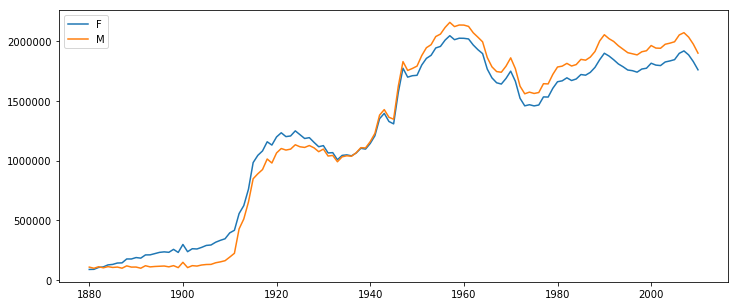

In [18]:
syb_piv = dfTotalCopy.pivot_table('births', rows='year', cols='sex', aggfunc=sum)
pivot_table(dfTotalCopy, values = 'births', index=['year'], columns=['sex'], aggfunc=sum)

### Q6) 각 년도별 출생인구 대비 해당 이름을 가진 아이의 이름 비율이 어느 정도인지를 나타내는 새로운 column 'prop' 추가하기

주의 및 참고
- 예를 들어, 1880에 태어난 아기가 100명이고 그 중 철수라는 이름을 가진 아이가 7명이라면 1880년도 철수의 prop은 0.07
- 같은 성별 안에서 이름이 같아야지만 같은 이름으로 본다.
    - 예를 들어, 1880년에 태어난 100명 중 민수라는 이름을 가진 남자 아이가 3명, 여자 아이가 1명이라면 각각의 prop이 0.03, 0.01이 됨
    
Hint
- groupby
- apply

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


### Q7) 년도별, 성별별 많이 쓰인 이름 상위 1000개 추출하기

주의
- 다음 문제에서 쓰기 위하여 하나의 새로운 객체에 년도별, 성별별 많이 쓰인 이름 상위 1000개의 정보를 저장

Hint
- gorupby
- sort_index
- apply

C:\Users\LJE\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

## 이름 트렌드 분석

년도별, 성별별 상위 1000개의 이름 정보를 이용해 이름 트렌드 분석

### Q8) 세로축은 년도, 가로축은 이름으로 하는 pivot table 만들기

주의
- 성별을 구분하지 않고 이름만 같으면 같은 이름이라고 봄

Hint
- pivot_table
- pivot_table의 parameter중 aggfuc 값 알맞게 설정 필요

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


### Q9) 년도별 'John', 'Harry', 'Mary', 'Marilyn' 이름을 가진 아이들의 수 변화를 그래프로 나타내기 (ASN2)

주의
- 4가지 이름의 변화를 한 그래프에 함께 나타낼 것
- 성별을 구분하지 않고 이름만 같으면 같은 이름이라고 봄

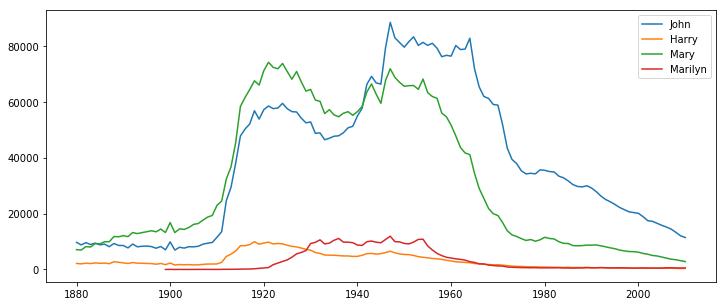

## 이름의 다양성 변화 분석

위에서 얻은 그래프를 보면 많이 사용되던 이름이 최근에 들수록 덜 사용되는 것을 확인할 수 있다. 이로부터 우리는 부모들이 점점 비슷한 이름을 사용하는 것을 거부하고 다른 아이들과는 다른 이름을 짓고자 한다는 가설을 새울 수 있다. 이름의 다양성 변화 분석을 통해 이 가설이 맞는지 확인해 보자.

### Q10) 해당 년도 전체 출생인구 중 성별별, 년도별 상위 1000개 이름의 비율이 시간에 따라 어떻게 변하는지를 보이는 그래프 그리기 (ASN2)

주의
- 성별에 따라 분리해서 생각

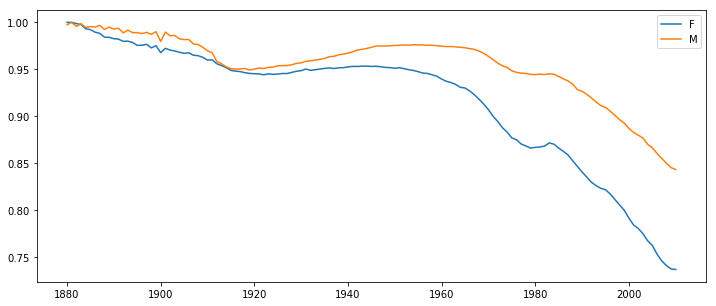

### Q11) 각 년도별로 많이 사용되는 이름순으로 아이들을 줄세웠을 때, 앞에서부터 전체 출생인구의 반에 해당하는 아이들이 가지는 이름의 종류의 수의 변화를 그래프로 나타내기 (ASN2)

주의
- 성별에 따라 분리해서 생각

C:\Users\LJE\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


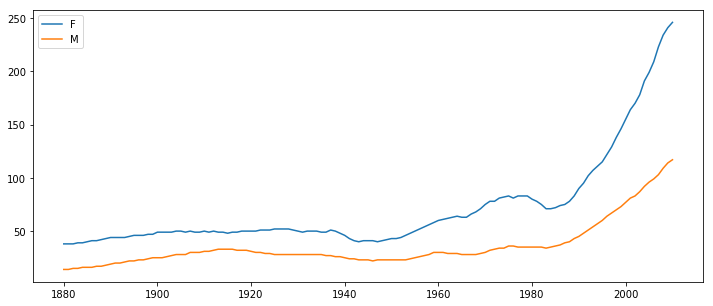

## 이름의 성별 변화 분석

여자 아이의 이름이 남자 아이의 이름으로, 남자 아이의 이름이 여자 아이의 이름으로도 쓰이게 되는 변화에 대한 분석

참고 : 위에서 구한 년도별, 성별별 많이 쓰인 이름 상위 1000개 데이터 이용

### Q13) 상위 1000개의 이름 중 'lesl'로 시작하는 이름 구하기

Hint
- 이름 비교시 lower 활용 (모두 소문자로 바꿔서 비교하면 편함)

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

### Q14) 'lesl'로 시작하는 이름의 년도별, 성별별 출생인구 구하기

name sex  births  year      prop
year sex                                            
1880 F   654      Leslie   F       8  1880  0.000088
     M   1108     Leslie   M      79  1880  0.000715
1881 F   2523     Leslie   F      11  1881  0.000120
     M   3072     Leslie   M      92  1881  0.000913
1882 F   4593     Leslie   F       9  1882  0.000083
     M   5081     Leslie   M     122  1882  0.001073
         5865     Lesley   M       6  1882  0.000053
1883 F   6850     Leslie   F       7  1883  0.000062
     M   7225     Leslie   M     120  1883  0.001147
         8093     Lesley   M       5  1883  0.000048
1884 F   8697     Leslie   F      15  1884  0.000116
     M   9432     Leslie   M     125  1884  0.001092
1885 F   11161    Leslie   F      10  1885  0.000075
     M   11751    Leslie   M     122  1885  0.001132
1886 F   13601    Leslie   F       8  1886  0.000055
     M   14132    Leslie   M     136  1886  0.001228
1887 F   15806    Leslie   F      12  1887  0.000082
     M   16524    Leslie   M     166  1887  0.001637
1888 F   18030    Leslie   F      23  1888  0.000129
     M   19074    Leslie   M     175  1888  0.001448
1889 F   20690    Leslie   F      23  1889  0.000129
     M   21737    Leslie   M     155  1889  0.001402
1890 F   23332    Leslie   F      20  1890  0.000105
     M   24372    Leslie   M     181  1890  0.001630
1891 F   25928    Leslie   F      28  1891  0.000151
     M   27068    Leslie   M     164  1891  0.001621
1892 F   28704    Leslie   F      22  1892  0.000104
     M   29851    Leslie   M     207  1892  0.001696
1893 F   31576    Leslie   F      26  1893  0.000122
     M   32765    Leslie   M     185  1893  0.001647
...                  ...  ..     ...   ...       ...
2000 F   1332261  Leslie   F    3619  2000  0.001995
         1332560   Lesly   F     742  2000  0.000409
         1332601  Lesley   F     658  2000  0.000363
2001 F   1362012  Leslie   F    3610  2001  0.002007
         1362300   Lesly   F     801  2001  0.000445
         1362452  Lesley   F     509  2001  0.000283
2002 F   1392272  Leslie   F    3520  2002  0.001962
         1392586   Lesly   F     717  2002  0.000400
         1392743  Lesley   F     471  2002  0.000262
2003 F   1422818  Leslie   F    3635  2003  0.001992
         1423091   Lesly   F     838  2003  0.000459
         1423330  Lesley   F     451  2003  0.000247
2004 F   1453982  Leslie   F    3497  2004  0.001908
         1454295   Lesly   F     747  2004  0.000408
         1454500  Lesley   F     450  2004  0.000245
2005 F   1486010  Leslie   F    3120  2005  0.001692
         1486308   Lesly   F     783  2005  0.000425
         1486623  Lesley   F     381  2005  0.000207
2006 F   1518523  Leslie   F    3035  2006  0.001600
         1518834   Lesly   F     761  2006  0.000401
         1519161  Lesley   F     370  2006  0.000195
2007 F   1552581  Leslie   F    2689  2007  0.001403
         1552882   Lesly   F     765  2007  0.000399
         1553271  Lesley   F     351  2007  0.000183
2008 F   1587484  Leslie   F    2323  2008  0.001233
         1587788   Lesly   F     699  2008  0.000371
2009 F   1622503  Leslie   F    1975  2009  0.001081
         1622845   Lesly   F     598  2009  0.000327
2010 F   1657142  Leslie   F    1558  2010  0.000886
         1657525   Lesly   F     502  2010  0.000285

[400 rows x 5 columns]

### Q15) 년도별 'lesl'로 시작하는 이름을 가진 여자 아이의 총 수와, 남자 아이의 총 수 구하기 

참고
- 다음 문제에서 활용하기 위하여 새로운 객체에 정보를 저장할 것 

Hint
- pivot_table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
1885,10.0,122.0
1886,8.0,136.0
1887,12.0,166.0
1888,23.0,175.0


### Q16) 년도별 'lesl'로 시작하는 이름을 가진 아이들 중에 여자 아이의 비율, 남자 아이의 비율 구하기

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
1885,0.075758,0.924242
1886,0.055556,0.944444
1887,0.067416,0.932584
1888,0.116162,0.883838


### Q17) 성별별 'lesl'로 시작하는 이름을 가진 아이의 비율 변화를 그래프로 나타내기 (ASN2)

참고
- 남자 아이의 그래프 선 스타일 : k-
- 여자 아이의 그래프 선 스타일 : k--

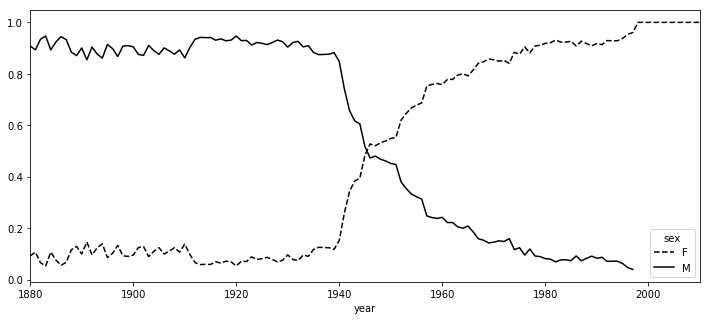